In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import os
import matplotlib.style
from functools import partial, reduce
from pandas.core.common import flatten

plt.style.use('ggplot')


In [2]:
pairs_list = [
    'EURUSD/EURUSD_H4 - EURUSD_H4',
    'AUDUSD/AUDUSD_H4 - AUDUSD_H4',
    'GBPUSD/GBPUSD_H4 - GBPUSD_H4',
    'NZDUSD/NZDUSD_H4 - NZDUSD_H4',
    'USDCAD/USDCAD_H4 - USDCAD_H4',
    'USDCHF/USDCHF_H4 - USDCHF_H4',
    # XAUUSD
    # UPY   Diffent comput lotsize
   
]

In [3]:
df ={}
for pair in range(len(pairs_list)) :
    df[pair] = pd.read_csv('../../Data_Forex/'+pairs_list[pair]+'.csv',index_col=0,parse_dates=True)

In [4]:
df[0]

,Open,High,Low,Close,Volume
Time,,,,,
2007-03-05 12:00:00,1.30956,1.31145,1.30723,1.30979,185987
2007-03-05 16:00:00,1.30960,1.31112,1.30833,1.30981,1025327
2007-03-05 20:00:00,1.30979,1.30986,1.30782,1.30840,235967
2007-03-06 00:00:00,1.30813,1.31113,1.30798,1.31071,191415
2007-03-06 04:00:00,1.31078,1.31262,1.30923,1.31211,187099
...,...,...,...,...,...
2023-03-10 00:00:00,1.05855,1.05993,1.05791,1.05967,62976
2023-03-10 04:00:00,1.05967,1.06066,1.05809,1.05948,58412
2023-03-10 08:00:00,1.05946,1.06036,1.05738,1.05894,86765


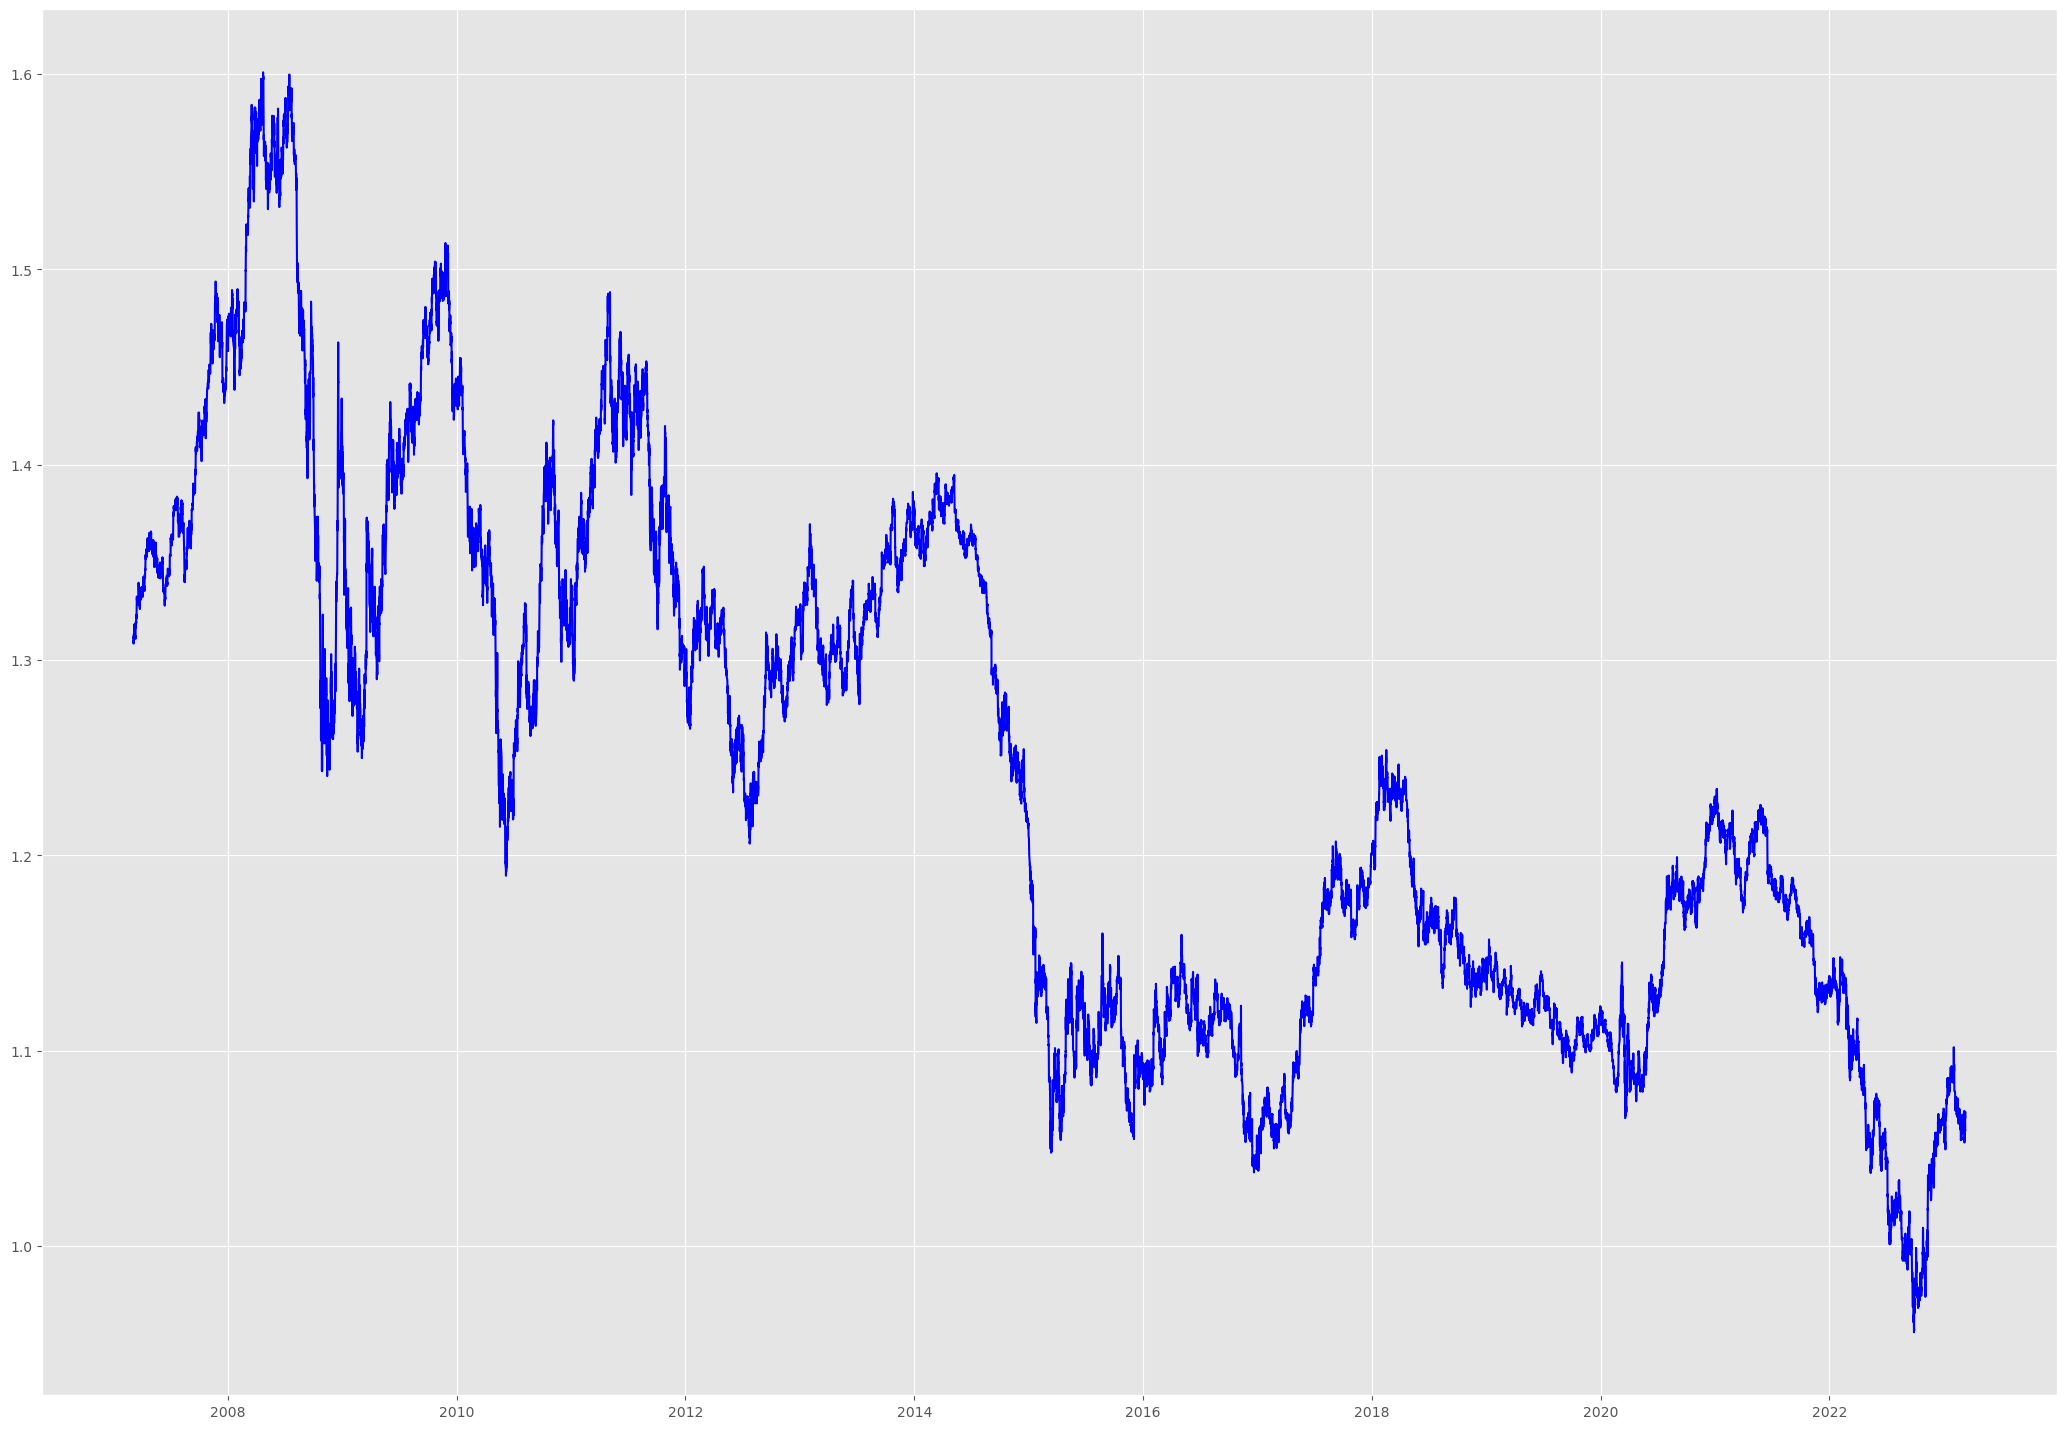

In [5]:
plt.figure(figsize=(26,18))
plt.plot(df[0]['Close'],color='blue')

In [6]:
def SMA(df,fast,slow):
    df['sma_fast'] = df['Close'].rolling(fast).mean()
    df['sma_slow'] = df['Close'].rolling(slow).mean()
    return df


def ATR(df,n):
    df = df.copy()
    df['High-Low'] = abs(df['High'] - df['Low'])
    df['High-PrevClose'] = abs(df['High'] - df['Close'].shift(1))
    df['Low-PrevClose'] = abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['High-Low','High-PrevClose','Low-PrevClose']].max(axis = 1,skipna = False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df = df.drop(['High-Low','High-PrevClose','Low-PrevClose'],axis=1)
    return df

In [7]:
# Strategy parameter
account_size = 10000
slippage = 2
size = 1
ATR_SL = 0.5

for pair in range(len(pairs_list)) :
    df[pair]['ATR']= ATR(df[pair],20)['ATR']
    df[pair]['sma_fast'] = SMA(df[pair],50,200)['sma_fast']

    # ยกเว้นคู่เงิน JPY
    df[pair]['spread'] = float(slippage)/float(10000)
    df[pair]['size'] = float(size) * float(10000)
    print('Pair:',pairs_list[pair])


Pair: EURUSD/EURUSD_H4 - EURUSD_H4
Pair: AUDUSD/AUDUSD_H4 - AUDUSD_H4
Pair: GBPUSD/GBPUSD_H4 - GBPUSD_H4
Pair: NZDUSD/NZDUSD_H4 - NZDUSD_H4
Pair: USDCAD/USDCAD_H4 - USDCAD_H4
Pair: USDCHF/USDCHF_H4 - USDCHF_H4


In [8]:
df[0]

,Open,High,Low,Close,Volume,ATR,sma_fast,sma_slow,spread,size
Time,,,,,,,,,,
2007-03-05 12:00:00,1.30956,1.31145,1.30723,1.30979,185987,NaN,NaN,NaN,0.0002,10000.0
2007-03-05 16:00:00,1.30960,1.31112,1.30833,1.30981,1025327,NaN,NaN,NaN,0.0002,10000.0
2007-03-05 20:00:00,1.30979,1.30986,1.30782,1.30840,235967,NaN,NaN,NaN,0.0002,10000.0
2007-03-06 00:00:00,1.30813,1.31113,1.30798,1.31071,191415,NaN,NaN,NaN,0.0002,10000.0
2007-03-06 04:00:00,1.31078,1.31262,1.30923,1.31211,187099,NaN,NaN,NaN,0.0002,10000.0
...,...,...,...,...,...,...,...,...,...,...
2023-03-10 00:00:00,1.05855,1.05993,1.05791,1.05967,62976,0.002701,1.060872,1.071393,0.0002,10000.0
2023-03-10 04:00:00,1.05967,1.06066,1.05809,1.05948,58412,0.002755,1.060877,1.071246,0.0002,10000.0
2023-03-10 08:00:00,1.05946,1.06036,1.05738,1.05894,86765,0.002823,1.060869,1.071092,0.0002,10000.0


In [9]:
open_trade = {}
trade = {}
long_take_profit = {}
short_take_profit = {}
long_stop_loss = {}
short_stop_loss = {}
long_entry_price = {}
short_entry_price = {}

for pair in range(len(pairs_list)) :
    open_trade[pair] = []
    trade[pair] = {}
    long_take_profit[pair] = []
    short_take_profit[pair] = []
    long_stop_loss[pair] = []
    short_stop_loss[pair] = []
    long_entry_price[pair] = []
    short_entry_price[pair] = []
    for i in range(50,len(df[pair])) :

        # Buy
        if df[pair]['sma_fast'][i-1] < df[pair]['sma_slow'][i-1] and df[pair]['sma_fast'][i] >= df[pair]['sma_slow'][i] and len(open_trade[pair]) == 0 :
            print(i, 'New Long trade at Price:', round(df[pair]['Close'][i],4), 'On day:', df[pair].index[i], 'Pair:', pairs_list[pair])
            trade[pair][i] = {
                'ID':i,
                'date_of_trade':df[pair].index[i],
                'entry_price':df[pair]['Close'][i],
                'signal':'Buy',
                'result':0,
                'TP':df[pair]['Close'][i] + df[pair]['ATR'][i] * ATR_SL,
                'SL':df[pair]['Close'][i] - df[pair]['ATR'][i] * ATR_SL
            }
            open_trade[pair].append(i)
            long_take_profit[pair].append(trade[pair][i]['TP'])
            long_stop_loss[pair].append(trade[pair][i]['SL'])
            long_entry_price[pair].append(trade[pair][i]['entry_price'])

        # Sell
        if df[pair]['sma_fast'][i-1] > df[pair]['sma_slow'][i-1] and df[pair]['sma_fast'][i] <= df[pair]['sma_slow'][i] and len(open_trade[pair]) == 0 :
            print(i, 'New Short trade at Price:', round(df[pair]['Close'][i],4), 'On day:', df[pair].index[i], 'Pair:', pairs_list[pair])
            trade[pair][i] = {
                'ID':i,
                'date_of_trade':df[pair].index[i],
                'entry_price':df[pair]['Close'][i],
                'signal':'Sell',
                'result':0,
                'TP':df[pair]['Close'][i] - df[pair]['ATR'][i] * ATR_SL,
                'SL':df[pair]['Close'][i] + df[pair]['ATR'][i] * ATR_SL
            }   
            
            
            open_trade[pair].append(i)
            short_take_profit[pair].append(trade[pair][i]['TP'])
            short_stop_loss[pair].append(trade[pair][i]['SL'])
            short_entry_price[pair].append(trade[pair][i]['entry_price'])


        # Exit trades---------------------------------------------------------
        # Buy profit
        if any(y <= df[pair]['Close'][i] for y in long_take_profit[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result',{}) == 0 and trade[pair][j].get('signal',{}) == 'Buy':
                    if df[pair]['Close'][i] >= trade[pair][j]['TP']:
                        trade[pair][j].update({'result': (trade[pair][j]['TP'] - trade[pair][j]['entry_price']-df[pair]['spread'][i])*df[pair]['size'][i]})
                        print(j,
                              'Long profit at price:', round(df[pair]['Close'][i],4),'ON day:' ,df[pair].index[i],'With profit:',round(trade[pair][j]['result'],4),'\n')
                        open_trade[pair].remove(j)
                        long_take_profit[pair].remove(trade[pair][j]['TP'])
                        long_stop_loss[pair].remove(trade[pair][j]['SL'])

        # Buy loss
        if any(y >= df[pair]['Close'][i] for y in long_stop_loss[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result',{}) == 0 and trade[pair][j].get('signal',{}) == 'Buy':
                    if df[pair]['Close'][i] <= trade[pair][j]['SL']:
                        trade[pair][j].update({'result': (trade[pair][j]['SL'] - trade[pair][j]['entry_price']-df[pair]['spread'][i])*df[pair]['size'][i]})
                        print(j,
                              'Long loss at price:', round(df[pair]['Close'][i],4),'ON day:' ,df[pair].index[i],'With loss:',round(trade[pair][j]['result'],4),'\n')
                        open_trade[pair].remove(j)
                        long_take_profit[pair].remove(trade[pair][j]['TP'])
                        long_stop_loss[pair].remove(trade[pair][j]['SL'])

        # Sell profit
        if any(y >= df[pair]['Close'][i] for y in short_take_profit[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result',{}) == 0 and trade[pair][j].get('signal',{}) == 'Sell':
                    if df[pair]['Close'][i] <= trade[pair][j]['TP']:
                        trade[pair][j].update({'result': (trade[pair][j]['entry_price']-trade[pair][j]['TP']-df[pair]['spread'][i])*df[pair]['size'][i]})
                        print(j,
                              'Short profit at price:', round(df[pair]['Close'][i],4),'ON day:' ,df[pair].index[i],'With profit:',round(trade[pair][j]['result'],4),'\n')
                        open_trade[pair].remove(j)
                        short_take_profit[pair].remove(trade[pair][j]['TP'])
                        short_stop_loss[pair].remove(trade[pair][j]['SL'])

        # Sell loss
        if any(y <= df[pair]['Close'][i] for y in short_stop_loss[pair]):
            for j in open_trade[pair]:
                if trade[pair][j].get('result',{}) == 0 and trade[pair][j].get('signal',{}) == 'Sell':
                    if df[pair]['Close'][i] >= trade[pair][j]['SL']:
                        trade[pair][j].update({'result': (trade[pair][j]['entry_price']-trade[pair][j]['SL']-df[pair]['spread'][i])*df[pair]['size'][i]})
                        print(j,
                              'Short loss at price:', round(df[pair]['Close'][i],4),'ON day:' ,df[pair].index[i],'With loss:',round(trade[pair][j]['result'],4),'\n')
                        open_trade[pair].remove(j)
                        short_take_profit[pair].remove(trade[pair][j]['TP'])
                        short_stop_loss[pair].remove(trade[pair][j]['SL'])

        # Exit after time
        if len(open_trade[pair]) != 0:
            for j in open_trade[pair] :
                if trade[pair][j].get('result',{}) == 0 and trade[pair][j].get('signal', {}) == 'Buy' :
                    if (i - trade[pair][j]['ID']) >= 3  and trade[pair][j].get('result',{}) == 0 and trade[pair][j].get('signal',{}) == 'Buy':
                        trade[pair][j].update({'result': (df[pair]['Close'][i] - trade[pair][j]['entry_price']-df[pair]['spread'][i])*df[pair]['size'][i]})
                        print(j,
                              'Long exited after 12 hours', round(df[pair]['Close'][i],4),'ON day:' ,df[pair].index[i],'With profit:',round(trade[pair][j]['result'],4),'\n')
                        open_trade[pair].remove(j)
                        long_take_profit[pair].remove(trade[pair][j]['TP'])
                        long_stop_loss[pair].remove(trade[pair][j]['SL'])

                      


                    elif  (i - trade[pair][j]['ID']) >= 3 and trade[pair][j].get('result',{}) == 0 and trade[pair][j].get('signal',{}) == 'Sell':
                        trade[pair][j].update({'result': ( trade[pair][j]['entry_price']-df[pair]['Close'][i]-df[pair]['spread'][i])*df[pair]['size'][i]})
                        print(j,
                              'Short exited after 12 hours', round(df[pair]['Close'][i],4),'ON day:' ,df[pair].index[i],'With profit:',round(trade[pair][j]['result'],4),'\n')
                        open_trade[pair].remove(j)
                        short_take_profit[pair].remove(trade[pair][j]['TP'])
                        short_stop_loss[pair].remove(trade[pair][j]['SL'])


331 New Short trade at Price: 1.3486 On day: 2007-05-18 00:00:00 Pair: EURUSD/EURUSD_H4 - EURUSD_H4
331 Short loss at price: 1.3498 ON day: 2007-05-18 04:00:00 With loss: -13.785 

519 New Long trade at Price: 1.3497 On day: 2007-06-29 08:00:00 Pair: EURUSD/EURUSD_H4 - EURUSD_H4
519 Long profit at price: 1.3519 ON day: 2007-06-29 12:00:00 With profit: 9.7925 

722 New Short trade at Price: 1.3513 On day: 2007-08-15 00:00:00 Pair: EURUSD/EURUSD_H4 - EURUSD_H4
722 Short profit at price: 1.3489 ON day: 2007-08-15 04:00:00 With profit: 15.265 

827 New Long trade at Price: 1.3667 On day: 2007-09-07 00:00:00 Pair: EURUSD/EURUSD_H4 - EURUSD_H4
827 Long profit at price: 1.3687 ON day: 2007-09-07 08:00:00 With profit: 15.1 

1263 New Short trade at Price: 1.4497 On day: 2007-12-14 08:00:00 Pair: EURUSD/EURUSD_H4 - EURUSD_H4
1263 Short profit at price: 1.4434 ON day: 2007-12-14 12:00:00 With profit: 25.485 

1358 New Long trade at Price: 1.4772 On day: 2008-01-04 16:00:00 Pair: EURUSD/EURUSD_H4

In [10]:
trade

{0: {331: {'ID': 331,
   'date_of_trade': Timestamp('2007-05-18 00:00:00'),
   'entry_price': 1.34861,
   'signal': 'Sell',
   'result': -13.784999999999714,
   'TP': 1.3474315000000001,
   'SL': 1.3497885},
  519: {'ID': 519,
   'date_of_trade': Timestamp('2007-06-29 08:00:00'),
   'entry_price': 1.34971,
   'signal': 'Buy',
   'result': 9.792500000000759,
   'TP': 1.35088925,
   'SL': 1.34853075},
  722: {'ID': 722,
   'date_of_trade': Timestamp('2007-08-15 00:00:00'),
   'entry_price': 1.3513,
   'signal': 'Sell',
   'result': 15.26499999999964,
   'TP': 1.3495735,
   'SL': 1.3530265},
  827: {'ID': 827,
   'date_of_trade': Timestamp('2007-09-07 00:00:00'),
   'entry_price': 1.36666,
   'signal': 'Buy',
   'result': 15.100000000001002,
   'TP': 1.36837,
   'SL': 1.3649499999999999},
  1263: {'ID': 1263,
   'date_of_trade': Timestamp('2007-12-14 08:00:00'),
   'entry_price': 1.44965,
   'signal': 'Sell',
   'result': 25.485000000000426,
   'TP': 1.4469015,
   'SL': 1.4523985000000001

In [11]:
pairs_results = {}
profits = {}
losses = {}
be = {}

for pair in range(len(pairs_list)) :
    profits[pair] = []
    losses[pair] = []
    be[pair] = []
    pairs_results[pair] = pd.DataFrame.from_dict({(i,j):trade[pair][j] for j in trade[pair].keys()}, orient = 'index')
    pairs_results[pair] = pairs_results[pair].drop(['signal','ID','TP','SL'],axis = 1)
    pairs_results[pair].set_index('date_of_trade',inplace = True)
    pairs_results[pair]['cum_res'] = pairs_results[pair]['result'].cumsum() + account_size


    for t in trade[pair] :
        profits[pair].append(trade[pair][t]['result']) if trade[pair][t]['result'] > 0.1 else ''
        losses[pair].append(trade[pair][t]['result']) if trade[pair][t]['result'] < -0.1 else ''
        be[pair].append(trade[pair][t]['result']) if -0.1 <= trade[pair][t]['result'] <= 0.1 else ''

my_reduce = partial(pd.merge, on = 'date_of_trade', how = 'outer')
strategy_results = reduce(my_reduce,pairs_results.values())
strategy_results = strategy_results.sort_index()
strategy_results['final_res'] = strategy_results.filter(like='result',axis=1).sum(axis=1)
strategy_results['cum_res'] = strategy_results['final_res'].cumsum() + account_size

profits_keys = list(profits.keys())
profits_values = [profits[x] for x in profits_keys]
str_profits = list(flatten(profits_values))

losses_keys = list(losses.keys())
losses_values = [losses[x] for x in losses_keys]
str_losses = list(flatten(losses_values))

be_keys = list(be.keys())
be_values = [be[x] for x in be_keys]
str_be = list(flatten(be_values))




C:\Users\Win10\AppData\Local\Temp\ipykernel_8920\1404998226.py:22: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cum_res_x', 'entry_price_x', 'result_x'} in the result is deprecated and will raise a MergeError in a future version.
  strategy_results = reduce(my_reduce,pairs_results.values())
C:\Users\Win10\AppData\Local\Temp\ipykernel_8920\1404998226.py:22: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cum_res_x', 'entry_price_x', 'result_x'} in the result is deprecated and will raise a MergeError in a future version.
  strategy_results = reduce(my_reduce,pairs_results.values())


Strategy returns: -2755


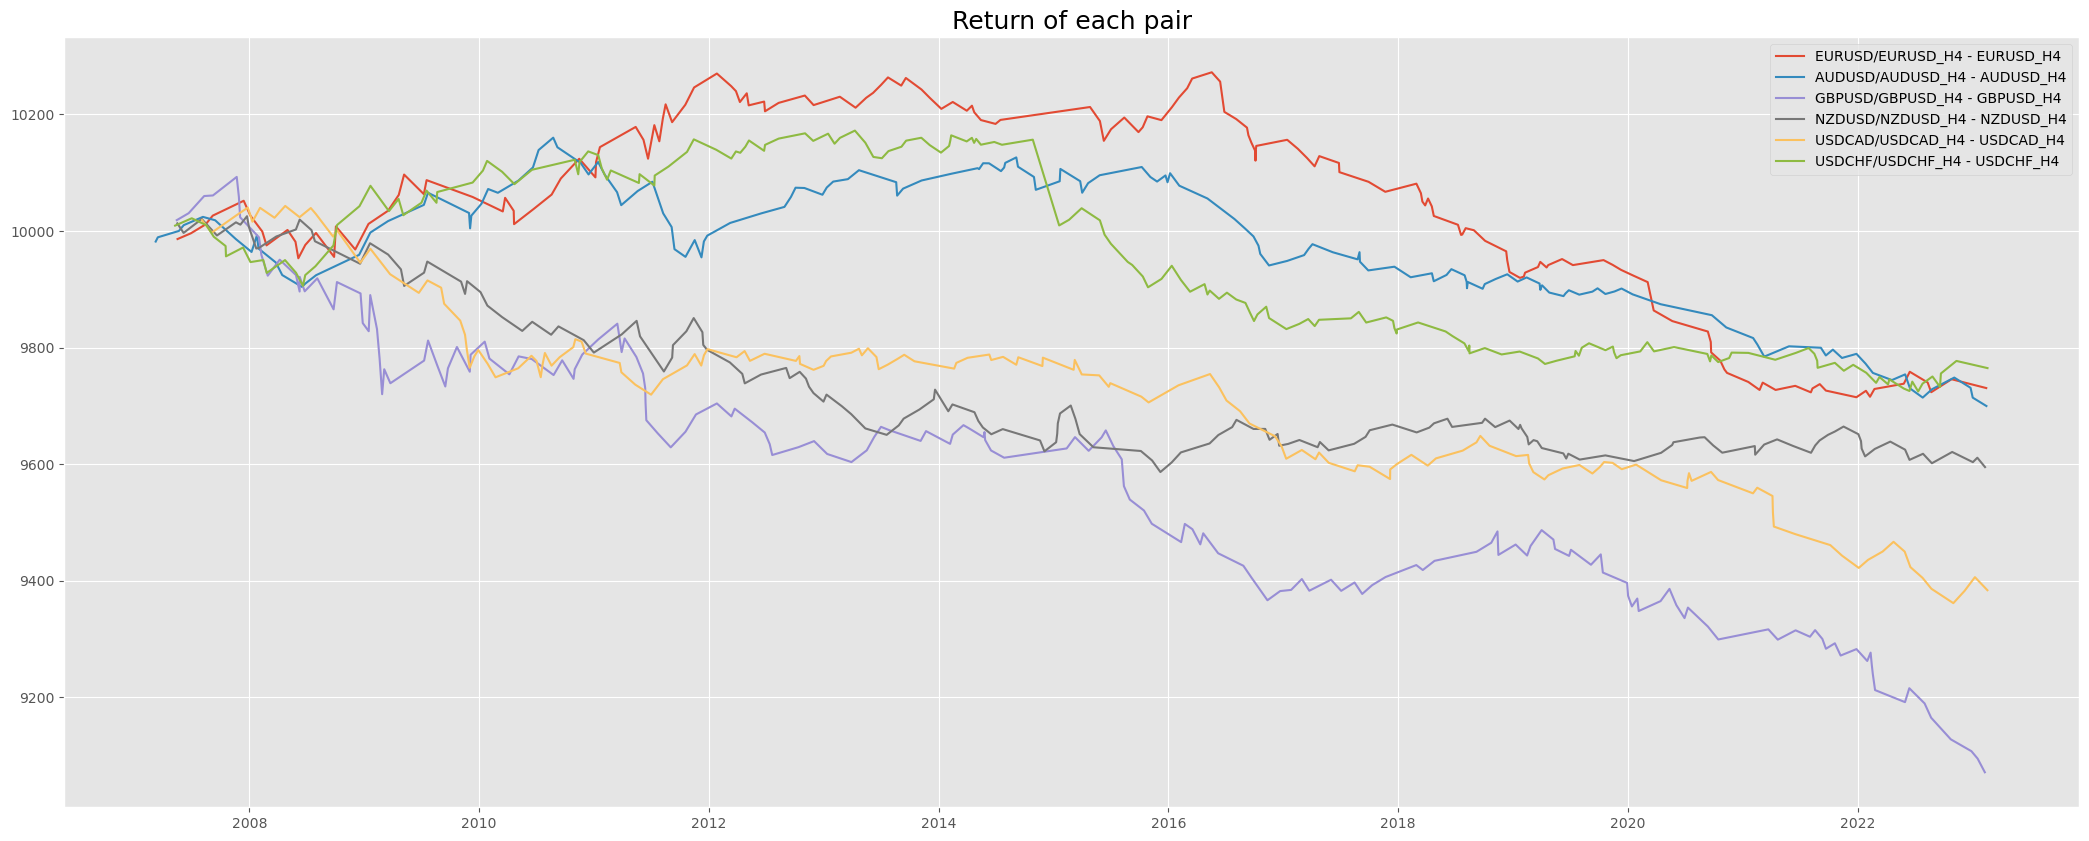

In [12]:
plt.figure(figsize= (26,10))
for pair in range(len(pairs_list)) :
    plt.plot(pairs_results[pair]['cum_res'], label = pairs_list[pair])

plt.legend()
plt.title('Return of each pair', fontsize =18)

print('Strategy returns:', round(strategy_results['cum_res'][-1]) - account_size)

In [13]:
strategy_results.head(50)

,entry_price_x,result_x,cum_res_x,entry_price_y,result_y,cum_res_y,entry_price_x,result_x,cum_res_x,entry_price_y,result_y,cum_res_y,entry_price_x,result_x,cum_res_x,entry_price_y,result_y,cum_res_y,final_res,cum_res
date_of_trade,,,,,,,,,,,,,,,,,,,,
2007-03-09 12:00:00,NaN,NaN,NaN,0.77965,-18.1275,9981.8725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.1275,9981.8725
2007-03-16 08:00:00,NaN,NaN,NaN,0.79436,7.3000,9989.1725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.3000,9989.1725
2007-05-10 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21590,9.2300,10009.2300,9.2300,9998.4025
2007-05-15 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.98600,18.6175,10018.6175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6175,10017.0200
2007-05-17 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73170,13.1175,10013.1175,NaN,NaN,NaN,NaN,NaN,NaN,13.1175,10030.1375
2007-05-18 00:00:00,1.34861,-13.7850,9986.2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.7850,10016.3525
2007-05-22 08:00:00,NaN,NaN,NaN,0.82117,10.9250,10000.0975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.9250,10027.2775
2007-06-06 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75250,-16.4050,9996.7125,NaN,NaN,NaN,NaN,NaN,NaN,-16.4050,10010.8725
2007-06-06 16:00:00,NaN,NaN,NaN,0.84187,9.9250,10010.0225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9250,10020.7975


In [14]:
pairs_results[0]

,entry_price,result,cum_res
date_of_trade,,,
2007-05-18 00:00:00,1.34861,-13.7850,9986.2150
2007-06-29 08:00:00,1.34971,9.7925,9996.0075
2007-08-15 00:00:00,1.35130,15.2650,10011.2725
2007-09-07 00:00:00,1.36666,15.1000,10026.3725
2007-12-14 08:00:00,1.44965,25.4850,10051.8575
...,...,...,...
2022-06-15 16:00:00,1.04541,20.5400,9758.5150
2022-08-11 12:00:00,1.03372,-18.3850,9740.1300
2022-08-22 20:00:00,0.99380,-16.7075,9723.4225


In [15]:
profits

{0: [9.792500000000759,
  15.26499999999964,
  15.100000000001002,
  25.485000000000426,
  26.437500000000338,
  22.884999999998936,
  20.564999999998836,
  52.30000000000046,
  43.874999999999666,
  22.499999999998412,
  27.19249999999929,
  34.95500000000074,
  24.087500000000485,
  23.397499999999518,
  26.23250000000055,
  24.539999999999342,
  27.54750000000006,
  33.87999999999924,
  26.23250000000055,
  25.660000000000462,
  34.667500000000516,
  27.135000000000133,
  30.487500000000225,
  39.02749999999933,
  24.402500000000106,
  29.7450000000008,
  29.775000000000553,
  23.922499999999626,
  14.972500000000943,
  6.500000000000174,
  14.437499999999437,
  12.609999999999344,
  14.354999999999007,
  17.017500000000354,
  8.399999999999299,
  13.797500000001017,
  12.757499999999977,
  13.1100000000004,
  11.78749999999984,
  8.609999999999786,
  6.842499999999198,
  22.137500000001033,
  19.847500000000686,
  20.057499999998953,
  8.300000000000864,
  18.739999999999092,
  22.